# [머신러닝 실습]

* 도미와 빙어를 분류하려고 합니다. 
* 도미의 길이와 무게를 측정하여 기입하고, 해당 관측치에는 1(도미)라고 라벨링합니다. (지도)
* 빙어의 길이와 무게를 측정하여 기입하고, 해당 관측치에는 0(빙어)라고 라벨링합니다. (학습)
* 수집된 데이터를 바탕으로 분류모델을 만들어 봅시다. 


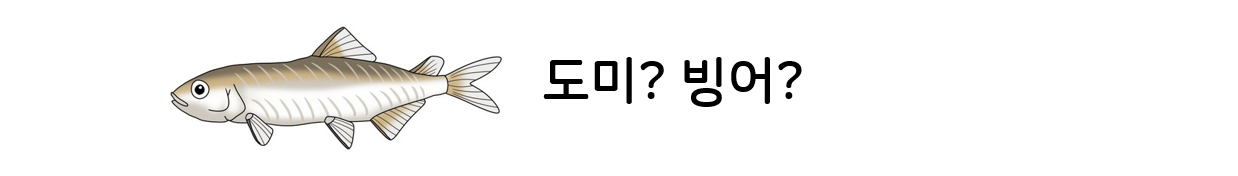

In [6]:
import pandas as pd

In [7]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]# zip함수 : list와 list를 묶어줌.
fish_target = [1]*35 + [0]*14 # [1 <- 도미 ] 35개 , [0 <- 빙어] 14개

> * class는 두가지 -> 이항분류
> * 각 class의 데이터 수는 35:14의 비율로 도미의 수가 더 많다
> * 각 class의 데이터 비율이 너무 극단적인 imbalanced Data라고 하면
>*  데이터 분할 및 평가 전반에 걸펴 많은 고민을 해야함. 조심해야하는 데이터

In [8]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [9]:
fish_df = pd.DataFrame(fish_data,columns=['길이','무게'])
fish_df.head()

,길이,무게
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [10]:
fish_df['Label'] = fish_target
fish_df.head()

,길이,무게,Label
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [11]:
fish_df['Label'].value_counts()

1    35
0    14
Name: Label, dtype: int64

In [12]:
fish_df

,길이,무게,Label
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


## 데이터 세트 분리

In [13]:
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가

In [14]:
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
X_train , X_test , y_train , y_test = train_test_split(fish_df[['길이','무게']],fish_df['Label'],test_size=(0.2),random_state=11)

In [16]:
y_train.shape

(39,)

In [17]:
y_test.shape

(10,)

In [18]:
X_train.shape # 39개의 saokem 2개의 label

(39, 2)

In [19]:
type(X_train),type(X_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

> * train_test_split() 모듈을 사용할 때 , 넣을 수 있는 데이터 타입은 list, df numpy형태이다
> * 따라서 넣는 데이터 타입에 따라 데이터를 탐색할 때 사용할 수 있는 함수가 달라진다
> * Attribute 에러를 만난다면, 사용하는 데이터의 타입을 체크하고 분할시 넣는 데이터 타입을 변경해보자

## 모델 학습

* K-최근접 이웃 알고리즘
    * 가장 간단한 알고리즘 중의 하나입니다. 
    * 데이터(별) 주변의 class를 살펴보고 많은쪽(다수)으로 클래스 분류하는 방식입니다. 

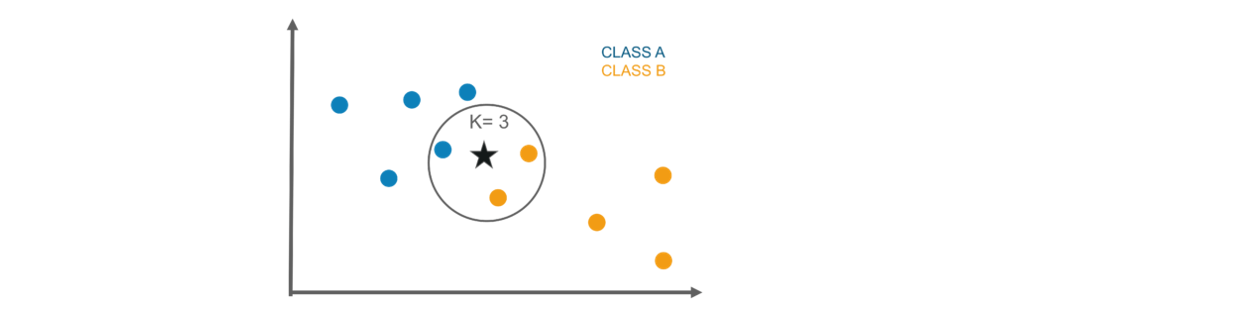

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)  # kn은 모델
pred = kn.predict(X_test) # pred 는 훈련완성된 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

In [21]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

## 예측 수행

In [22]:
pred = kn.predict(X_test)

## 평가

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

## 서비스

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)  # kn은 모델
pred = kn.predict(X_test) # pred 는 훈련완성된 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

In [26]:
length = 31.5
weight = 496

kn.predict([[length,weight]])
#[[  ,  ]] 2차원 == 메트릭스 임
#우리가 x_test했던 형태( 10 , 2 ) == 2차원

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)